# WiDS Datathon 2023
## Adapting to Climate Change by Improving Extreme Weather Forecasts

Accurate long-term forecasts of temperature and precipitation are crucial to help people prepare and adapt to these extreme weather events. Currently, purely physics-based models dominate short-term weather forecasting. But these models have a limited forecast horizon. The availability of meteorological data offers an opportunity for data scientists to improve sub-seasonal forecasts by blending physics-based forecasts with machine learning. Sub-seasonal forecasts for weather and climate conditions (lead-times ranging from 15 to more than 45 days) would help communities and industries adapt to the challenges brought on by climate change.

This year’s datathon, organized by the WiDS Worldwide team at Stanford University, Harvard University IACS, Arthur, and the WiDS Datathon Committee, will focus on longer-term weather forecasting to help communities adapt to extreme weather events caused by climate change.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime

# Regression Libraries libraries
import lightgbm as lgb

# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, model_selection
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold, KFold
from sklearn import feature_selection

# Reading data
___

In [ ]:
# Reading the train dataset
# train_df = pd.read_csv('/kaggle/input/widsdatathon2023/train_data.csv') 
train_df = pd.read_csv("data/train_data.csv")
print(f'The shape of the dataset is: {train_df.shape}')
train_df.head()

The shape of the dataset is: (375734, 246)


index  lat       lon startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.0  0.833333    9/1/14                              237.00   
1      1  0.0  0.833333    9/2/14                              228.90   
2      2  0.0  0.833333    9/3/14                              220.69   
3      3  0.0  0.833333    9/4/14                              225.28   
4      4  0.0  0.833333    9/5/14                              237.24   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     29.02                     31.64   
1                     29.02                     31.64   
2                     29.02                     31.64   
3                     29.02                     31.64   
4                     29.02                     31.64   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.57                    30.73                    29.71   
1                    29.57                    30.73                    29.71   
2                    29.57                    30.73                    29.71   
3                    29.57                    30.73                    29.71   
4                    29.57                    30.73                    29.71   

   ...  wind-vwnd-925-2010-11  wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  \
0  ...                 -27.68                 -37.21                   8.32   
1  ...                 -21.13                 -36.57                   8.77   
2  ...                 -10.72                 -34.16                   6.99   
3  ...                   0.33                 -31.04                   6.17   
4  ...                   9.83                 -31.80                   7.47   

   wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  \
0                   9.56                  -2.03                  48.13   
1                  21.17                   4.44                  48.60   
2                  32.16                   5.01                  48.53   
3                  39.66                  -1.41                  50.59   
4                  38.62                  -5.21                  54.73   

   wind-vwnd-925-2010-17  wind-vwnd-925-2010-18  wind-vwnd-925-2010-19  \
0                  28.09                 -13.50                  11.90   
1                  27.41                 -23.77                  15.44   
2                  19.21                 -33.16                  15.11   
3                   8.29                 -37.22                  18.24   
4                  -2.58                 -42.30                  21.91   

   wind-vwnd-925-2010-20  
0                   4.58  
1                   3.42  
2                   4.82  
3                   9.74  
4                  10.95  

[5 rows x 246 columns]

In [ ]:
# Reading the test dataset
# test_df = pd.read_csv('/kaggle/input/widsdatathon2023/test_data.csv') 
test_df = pd.read_csv("data/test_data.csv")
print(f'The shape of the dataset is: {test_df.shape}')
test_df.head()

The shape of the dataset is: (31354, 245)


index  lat       lon startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0  375734  0.0  0.833333   11/1/22                              339.88   
1  375735  0.0  0.833333   11/2/22                              334.63   
2  375736  0.0  0.833333   11/3/22                              337.83   
3  375737  0.0  0.833333   11/4/22                              345.81   
4  375738  0.0  0.833333   11/5/22                              357.39   

   nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                     30.88                     30.92   
1                     30.88                     30.92   
2                     30.88                     30.92   
3                     30.88                     30.92   
4                     30.88                     30.92   

   nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  nmme0-tmp2m-34w__cfsv20  \
0                    29.17                    31.02                    29.47   
1                    29.17                    31.02                    29.47   
2                    29.17                    31.02                    29.47   
3                    29.17                    31.02                    29.47   
4                    29.17                    31.02                    29.47   

   ...  wind-vwnd-925-2010-11  wind-vwnd-925-2010-12  wind-vwnd-925-2010-13  \
0  ...                 -19.28                 -39.77                 -29.25   
1  ...                 -19.58                 -43.14                 -28.62   
2  ...                 -13.73                 -44.22                 -27.67   
3  ...                  -7.97                 -49.47                 -19.32   
4  ...                  -0.80                 -56.07                  -9.89   

   wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  wind-vwnd-925-2010-16  \
0                  40.88                  -8.31                  14.91   
1                  45.37                  -5.42                  16.97   
2                  49.76                  -1.31                  21.44   
3                  52.62                  -0.44                  21.65   
4                  51.23                  -7.57                  19.86   

   wind-vwnd-925-2010-17  wind-vwnd-925-2010-18  wind-vwnd-925-2010-19  \
0                 -24.62                  31.05                 -23.69   
1                 -23.94                  28.84                 -20.61   
2                 -19.06                  26.85                 -16.78   
3                 -23.12                  23.70                 -18.62   
4                 -30.56                  20.66                 -25.08   

   wind-vwnd-925-2010-20  
0                   6.27  
1                  14.16  
2                  13.42  
3                  10.69  
4                  19.64  

[5 rows x 245 columns]

In [ ]:
# identifying the target column
target = [feature for feature in train_df.columns if feature not in test_df.columns][0]
print(target)

contest-tmp2m-14d__tmp2m


**Observations**
- Each row in the data corresponds to a single location and a single start date for the two-week period.
- The data provided for each date is a combination of:
    - weather and climate information for a number of US locations,
    - for a number of start dates for the two-week observation,
    - as well as the forecasted temperature and precipitation from a number of weather forecast models
- The train dataset has a shape of (375734, 246) while the test dataset is much smaller at (31354, 245).
___
- Target : contest-tmp2m-14d__tmp2m
    - "TMP2m" typically refers to the "2-meter temperature," which is a measurement of the air temperature at a height of 2 meters above the surface of the Earth. 
    - In this competition the target refers to the to the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.
    - Makes this a continous regression problem.

# Data Pre-processing (EDA & Cleaning)
___

## Basic overview of the features

In [ ]:
train_df.describe().style.background_gradient(cmap="Pastel1")

In [ ]:
dtype_df = train_df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

Column Type  Count
0       int64      4
1     float64    240
2      object      2

In [ ]:
cat_cols = train_df.select_dtypes(include='object').columns
cat_cols

Index(['startdate', 'climateregions__climateregion'], dtype='object')

**Observations**
- Our dataset is mostly numeric with only two categorical columns.
- It's also evident that we have missing values in pur dataset. _We deal with this in the next few cells..._
- First we explore the categorical columns

## Exploring the location features

In [ ]:
train_df['startdate'].value_counts()

9/1/14      514
12/25/15    514
12/27/15    514
12/28/15    514
12/29/15    514
           ... 
5/4/15      514
5/5/15      514
5/6/15      514
5/7/15      514
8/31/16     514
Name: startdate, Length: 731, dtype: int64

In [ ]:
test_df['startdate'].value_counts()

11/1/22     514
12/2/22     514
12/4/22     514
12/5/22     514
12/6/22     514
           ... 
11/26/22    514
11/27/22    514
11/28/22    514
11/29/22    514
12/31/22    514
Name: startdate, Length: 61, dtype: int64

**Observations**
- We have 713 unique start dates from 9th September 2014 to 31st August 2016.
- We have a time series problem with a big time gap between the training and the testing data.
- For each date in both train and test, we have 514 unique values meaning we have 514 unique locations.

In [ ]:
# Concatenate train and test data
all_df = pd.concat([train_df, test_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()
display(all_df)

print(f'{all_df.loc_group.nunique()} unique locations')

# Split back
train_df = all_df.iloc[:len(train_df)]
test_df = all_df.iloc[len(train_df):]

index  lat       lon startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0           0  0.0  0.833333    9/1/14                              237.00   
1           1  0.0  0.833333    9/2/14                              228.90   
2           2  0.0  0.833333    9/3/14                              220.69   
3           3  0.0  0.833333    9/4/14                              225.28   
4           4  0.0  0.833333    9/5/14                              237.24   
...       ...  ...       ...       ...                                 ...   
31349  407083  1.0  0.866667  12/27/22                               62.72   
31350  407084  1.0  0.866667  12/28/22                               73.41   
31351  407085  1.0  0.866667  12/29/22                               70.00   
31352  407086  1.0  0.866667  12/30/22                               79.81   
31353  407087  1.0  0.866667  12/31/22                               86.17   

       nmme0-tmp2m-34w__cancm30  nmme0-tmp2m-34w__cancm40  \
0                         29.02                     31.64   
1                         29.02                     31.64   
2                         29.02                     31.64   
3                         29.02                     31.64   
4                         29.02                     31.64   
...                         ...                       ...   
31349                      4.60                      8.71   
31350                      4.60                      8.71   
31351                      4.60                      8.71   
31352                      4.60                      8.71   
31353                      4.60                      8.71   

       nmme0-tmp2m-34w__ccsm30  nmme0-tmp2m-34w__ccsm40  \
0                        29.57                    30.73   
1                        29.57                    30.73   
2                        29.57                    30.73   
3                        29.57                    30.73   
4                        29.57                    30.73   
...                        ...                      ...   
31349                     6.05                    10.08   
31350                     6.05                    10.08   
31351                     6.05                    10.08   
31352                     6.05                    10.08   
31353                     6.05                    10.08   

       nmme0-tmp2m-34w__cfsv20  ...  wind-vwnd-925-2010-12  \
0                        29.71  ...                 -37.21   
1                        29.71  ...                 -36.57   
2                        29.71  ...                 -34.16   
3                        29.71  ...                 -31.04   
4                        29.71  ...                 -31.80   
...                        ...  ...                    ...   
31349                     6.39  ...                  -8.49   
31350                     6.39  ...                   0.83   
31351                     6.39  ...                  10.90   
31352                     6.39  ...                  21.37   
31353                     6.39  ...                  25.33   

       wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  \
0                       8.32                   9.56                  -2.03   
1                       8.77                  21.17                   4.44   
2                       6.99                  32.16                   5.01   
3                       6.17                  39.66                  -1.41   
4                       7.47                  38.62                  -5.21   
...                      ...                    ...                    ...   
31349                  32.39                  38.82                   7.42   
31350                  26.23                  37.64                  13.01   
31351                  21.06                  36.53                  14.15   
31352                  20.42                  36.05                   6.38   
31353                  26.

575 unique locations


In [ ]:
print('Locations in train that are not in test')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])

Locations in train that are not in test
[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 76, 101, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 181, 210, 239, 269, 300, 330, 360, 389, 418, 447, 475, 504, 533, 559]
Locations in test that are not in train
[52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 75, 100, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 180, 209, 238, 268, 299, 329, 359, 388, 417, 446, 474, 503, 532, 558]


**Observations**
- After reveiwing the competition discussions and notebooks, we found that [Flavia Felicioni](https://www.kaggle.com/flaviafelicioni) had investigated this issue in her notebook [WiDS 2023: different locations train/test SOLVED](https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved) and found that this issue is caused due to rounding differences between training and test data.
- She proposes to truncate the original latitude/longitude coordinates and re-create the location features in order to solve this issue.


In [ ]:
# creating a new feature describing unique locations in train
scale = 14

train_df.loc[:,'lat']=round(train_df.lat,scale)
train_df.loc[:,'lon']=round(train_df.lon,scale)

test_df.loc[:,'lat']=round(test_df.lat,scale)
test_df.loc[:,'lon']=round(test_df.lon,scale)

# creating a new feature describing the unique locations in train
train_df['loc_group'] = train_df.groupby(['lat','lon']).ngroup()
print(f'There are {train_df.loc_group.nunique()} unique locations in the train dataset')

# creating a new feature describing the unique locations in test
test_df['loc_group'] = test_df.groupby(['lat','lon']).ngroup()
print(f'There are {test_df.loc_group.nunique()} unique locations in the test dataset')

print('Locations in train that are not in test')
print([c for c in train_df.loc_group.unique() if c not in test_df.loc_group.unique()])

print('Locations in test that are not in train')
print([c for c in test_df.loc_group.unique() if c not in train_df.loc_group.unique()])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
<ipython-input-13-866ff7532912>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['loc_group'] = train_df.groupby(['lat','lon']).ngroup()
<ipython-input-13-866ff7532912>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

There are 514 unique locations in the train dataset
There are 514 unique locations in the test dataset
Locations in train that are not in test
[]
Locations in test that are not in train
[]


In [ ]:
print(train_df.shape)
print(test_df.shape)

(375734, 247)
(31354, 247)


In [ ]:
# removing the target from the previosuly concatenated all_df
test_df = test_df.drop(['contest-tmp2m-14d__tmp2m'], axis=1)

In [ ]:
print(train_df.shape)
print(test_df.shape)

(375734, 247)
(31354, 246)


## Exploraing the time series problem

In [ ]:
# converting the startdate feature to datettime datatype for easier pre-processing
train_df.startdate = pd.to_datetime(train_df.startdate)
test_df.startdate = pd.to_datetime(test_df.startdate)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


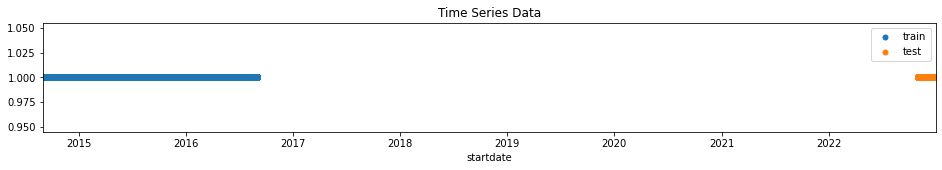

In [ ]:
# visualising the time series problem
fig, ax = plt.subplots(1,1, figsize=(16,2))
ax.set_title('Time Series Data')
sns.scatterplot(data = train_df, x = 'startdate', y = 1, marker='o', linewidth=0, label = 'train')
sns.scatterplot(data = test_df, x = 'startdate', y = 1, marker='o', linewidth=0, label = 'test')
ax.set_xlim([train_df['startdate'].iloc[0], test_df['startdate'].iloc[-1]])
plt.show()

**Resources on this issue**
- https://neptune.ai/blog/time-series-prediction-vs-machine-learning
- https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=r3XedPrWmeE1
- https://www.advancinganalytics.co.uk/blog/2021/06/22/10-incredibly-useful-time-series-forecasting-algorithms

### Exploring the target variable

In [ ]:
train_df['contest-tmp2m-14d__tmp2m'].describe()

count    375734.000000
mean         11.858568
std           9.867901
min         -20.358963
25%           4.818231
50%          12.285770
75%          19.441170
max          37.238782
Name: contest-tmp2m-14d__tmp2m, dtype: float64

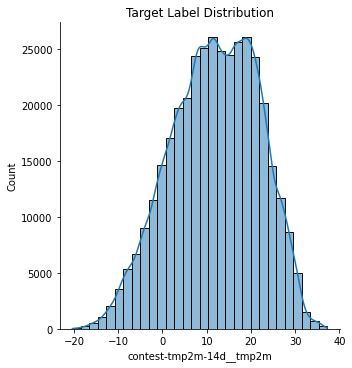

In [ ]:
sns.displot(data=train_df['contest-tmp2m-14d__tmp2m'], bins=30, kind='hist', kde=True,).set(title='Target Label Distribution')
plt.show()

### Visualising data drift in other features in both train and test 

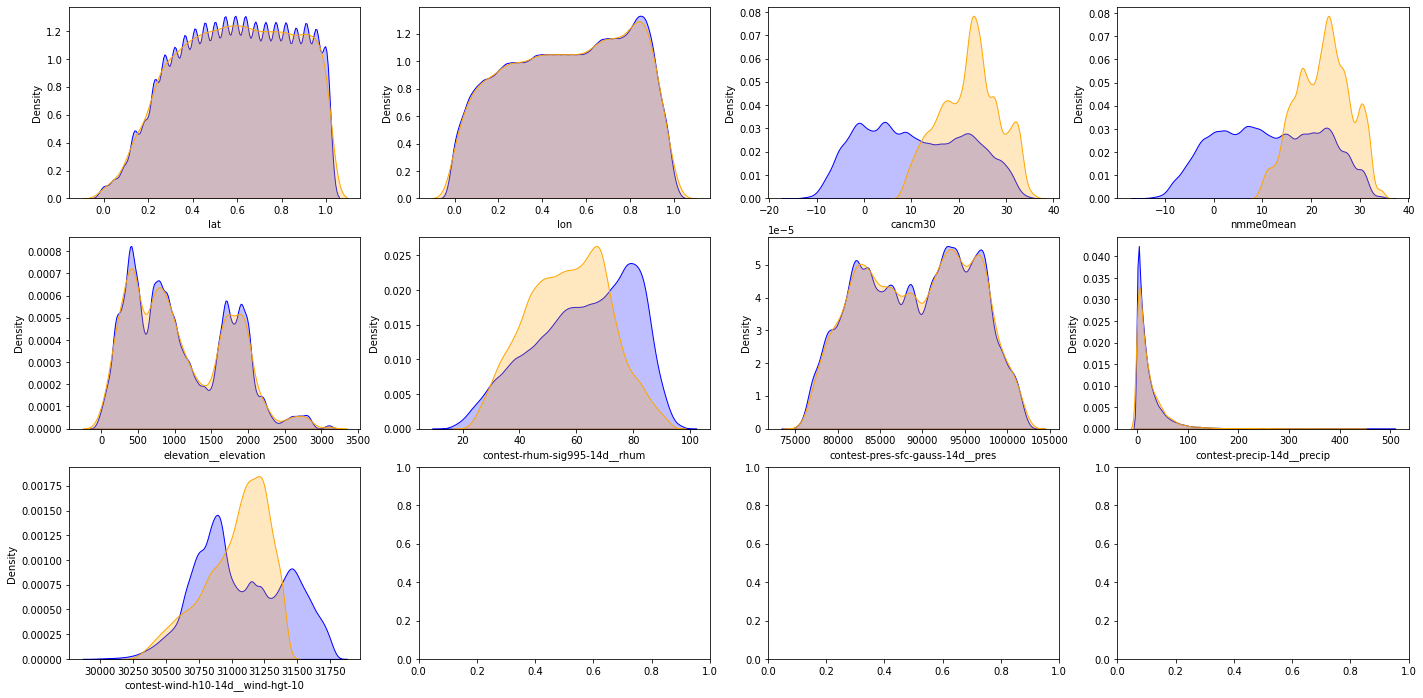

In [ ]:
def show_feature_distributions(features_list):
  width = 4
  height = math.ceil(len(features_list)/width)
  fig, axs = plt.subplots(height, width, figsize=(6*width, 4*height))
  for i, feature in enumerate(features_list):
    ax = axs.flat[i]
    feature = features_list[i]
    sns.kdeplot(data=train_df[feature],  color='blue', fill=True, ax=ax)
    sns.kdeplot(data=test_df[feature], color='orange', fill=True, ax=ax)
  plt.show()


features_list = ['lat', 'lon', 'cancm30', 'nmme0mean', 'elevation__elevation', 'contest-rhum-sig995-14d__rhum', 'contest-pres-sfc-gauss-14d__pres', 'contest-precip-14d__precip', 'contest-wind-h10-14d__wind-hgt-10'	]

show_feature_distributions(features_list)

**Observations**;
- The feature distribution plots show that many of our features have drifted between the train and test data sets.
- The exceptions are the 'lat' and 'lon' features.  This makes sense because these features reference location, which we would not expect to change over time in this data set.  

- The distributional changes we have shown here are called **Univariate drift** , meaning that the distributions of individual features have changed over time. 
- **Solutions to the Data Drift Problem**
  - Regularly retrain the model.
  - Create a robust model that can generalize well to new data ... calls for some sophisticated feature engineering work. 


Let's clean our data first!

In [ ]:
print(train_df.shape)
print(test_df.shape)

(375734, 247)
(31354, 246)


## Dealing with missing values

In [ ]:
# missing value 
train_df.isna().sum().sort_values(ascending=False)

nmme0-prate-34w__ccsm30    15934
nmme0-tmp2m-34w__ccsm30    15934
ccsm30                     15934
nmme0-prate-56w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
                           ...  
ccsm40                         0
cfsv20                         0
gfdlflora0                     0
gfdlflorb0                     0
loc_group                      0
Length: 247, dtype: int64

In [ ]:
null_cols = train_df.columns[train_df.isna().any()]
null_cols

Index(['nmme0-tmp2m-34w__ccsm30', 'nmme-tmp2m-56w__ccsm3',
       'nmme-prate-34w__ccsm3', 'nmme0-prate-56w__ccsm30',
       'nmme0-prate-34w__ccsm30', 'nmme-prate-56w__ccsm3',
       'nmme-tmp2m-34w__ccsm3', 'ccsm30'],
      dtype='object')

**Observations**
- It seems we have missing values in the model forecast features.
- Since these features are forecasts for each day, the value of one row is bound to be similar to the value for the next row since they are in the same date range and weather changes slowly over time.
- We will hence use the missing values with the previous row value  using the forward fill method (df.ffill()).

In [ ]:
train_df = train_df.sort_values(by=['loc_group', 'startdate']).ffill()

In [ ]:
# confirming we've filled missing value 
train_df.isna().sum().sort_values(ascending=False)

index                                       0
wind-hgt-850-2010-10                        0
sst-2010-2                                  0
sst-2010-3                                  0
sst-2010-4                                  0
                                           ..
contest-wind-uwnd-925-14d__wind-uwnd-925    0
contest-wind-h500-14d__wind-hgt-500         0
cancm30                                     0
cancm40                                     0
loc_group                                   0
Length: 247, dtype: int64

In [ ]:
# checking for duplicate rows  
train_df.duplicated().sum()

0

In [ ]:
# Checking for features with constant values
unique_df = train_df.nunique().reset_index()
unique_df.columns = ["col_name", "unique_count"]
constant_cols = unique_df[unique_df["unique_count"]==1]
constant_cols

Empty DataFrame
Columns: [col_name, unique_count]
Index: []

**Observations**
- Our data now has no missing values
- Our data also has no duplicate rows or constant columns

## Feature selection using corelation

In [ ]:
# Splitting the train dataset to prevent overfitting wehn checking for correlation

main_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m'])
A = train_df[main_cols]
B = train_df['contest-tmp2m-14d__tmp2m']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(A,B,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(263013, 245)
(112721, 245)


In [ ]:
X_train.corr(method='pearson').style.background_gradient(cmap='rocket_r')

In [ ]:
def identify_correlated(df, threshold):
    corr_matrix = df.corr().abs()
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    reduced_corr_matrix = corr_matrix.mask(mask)
    features_to_drop = [c for c in reduced_corr_matrix.columns if any(reduced_corr_matrix[c] > threshold)]
    return features_to_drop

In [ ]:
corr_features = identify_correlated(X_train, 0.96)
len(corr_features)

50

In [ ]:
corr_features

['cancm30',
 'cancm40',
 'ccsm30',
 'ccsm40',
 'cfsv20',
 'gfdl0',
 'gfdlflora0',
 'gfdlflorb0',
 'lat',
 'nasa0',
 'nmme-prate-34w__cancm3',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__nasa',
 'nmme-prate-34w__nmmemean',
 'nmme-tmp2m-34w__cancm3',
 'nmme-tmp2m-34w__cancm4',
 'nmme-tmp2m-34w__ccsm4',
 'nmme-tmp2m-34w__cfsv2',
 'nmme-tmp2m-34w__gfdl',
 'nmme-tmp2m-34w__gfdlflora',
 'nmme-tmp2m-34w__gfdlflorb',
 'nmme-tmp2m-34w__nasa',
 'nmme-tmp2m-34w__nmmemean',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme0-prate-34w__gfdlflora0',
 'nmme0-prate-56w__gfdlflora0',
 'nmme0-tmp2m-34w__cancm30',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm30',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme

In [ ]:
print('Original Shape of Train Dataset {}'.format(train_df.shape))

train_df.drop(labels=corr_features, axis=1, inplace=True)

print('Shape after dropping Constant Columns from Train Dataset {}'.format(train_df.shape))

Original Shape of Train Dataset (375734, 247)
Shape after dropping Constant Columns from Train Dataset (375734, 197)


In [ ]:
train_df.head()

index       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.833333 2014-09-01                              237.00   
1      1  0.833333 2014-09-02                              228.90   
2      2  0.833333 2014-09-03                              220.69   
3      3  0.833333 2014-09-04                              225.28   
4      4  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__nmme0mean  contest-wind-h10-14d__wind-hgt-10  \
0                       30.46                           31246.63   
1                       30.46                           31244.78   
2                       30.46                           31239.27   
3                       30.46                           31232.86   
4                       30.46                           31226.16   

   nmme-tmp2m-56w__nmmemean  contest-rhum-sig995-14d__rhum  \
0                     28.11                          81.72   
1                     28.11                          82.56   
2                     28.11                          83.29   
3                     28.11                          83.26   
4                     28.11                          82.50   

   nmme-prate-34w__ccsm3  nmme-prate-34w__ccsm4  ...  wind-vwnd-925-2010-12  \
0                  13.59                  25.28  ...                 -37.21   
1                  13.59                  25.28  ...                 -36.57   
2                  13.59                  25.28  ...                 -34.16   
3                  13.59                  25.28  ...                 -31.04   
4                  13.59                  25.28  ...                 -31.80   

   wind-vwnd-925-2010-13  wind-vwnd-925-2010-14  wind-vwnd-925-2010-15  \
0                   8.32                   9.56                  -2.03   
1                   8.77                  21.17                   4.44   
2                   6.99                  32.16                   5.01   
3                   6.17                  39.66                  -1.41   
4                   7.47                  38.62                  -5.21   

   wind-vwnd-925-2010-16  wind-vwnd-925-2010-17  wind-vwnd-925-2010-18  \
0                  48.13                  28.09                 -13.50   
1                  48.60                  27.41                 -23.77   
2                  48.53                  19.21                 -33.16   
3                  50.59                   8.29                 -37.22   
4                  54.73                  -2.58                 -42.30   

   wind-vwnd-925-2010-19  wind-vwnd-925-2010-20  loc_group  
0                  11.90                   4.58          0  
1                  15.44                   3.42          0  
2                  15.11                   4.82          0  
3                  18.24                   9.74          0  
4                  21.91                  10.95          0  

[5 rows x 197 columns]

In [ ]:
# Dropping the highly correlated features in the test dataset as well

print('Original Shape of Test Dataset {}'.format(test_df.shape))

test_df.drop(labels=corr_features, axis=1, inplace=True)

print('Shape after dropping Constant Columns from Train Dataset {}'.format(test_df.shape))

Original Shape of Test Dataset (31354, 246)
Shape after dropping Constant Columns from Train Dataset (31354, 196)


## Checking for outliers

In [ ]:
num_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m', 'startdate', 'climateregions__climateregion'])
num_cols

Index(['contest-pevpr-sfc-gauss-14d__pevpr', 'contest-precip-14d__precip',
       'contest-pres-sfc-gauss-14d__pres', 'contest-prwtr-eatm-14d__prwtr',
       'contest-rhum-sig995-14d__rhum', 'contest-slp-14d__slp',
       'contest-wind-h10-14d__wind-hgt-10',
       'contest-wind-h100-14d__wind-hgt-100',
       'contest-wind-h500-14d__wind-hgt-500',
       'contest-wind-h850-14d__wind-hgt-850',
       ...
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-2',
       'wind-vwnd-925-2010-20', 'wind-vwnd-925-2010-3', 'wind-vwnd-925-2010-4',
       'wind-vwnd-925-2010-5', 'wind-vwnd-925-2010-6', 'wind-vwnd-925-2010-7',
       'wind-vwnd-925-2010-8', 'wind-vwnd-925-2010-9'],
      dtype='object', length=193)

In [ ]:
# checking for outliers
outlier_cols = []

def detect_outliers_iqr(col, col_name):
    outliers = []
    col = sorted(col)
    q1 = np.percentile(col, 25)
    q3 = np.percentile(col, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in col: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    if(len(outliers) > 0):
      outlier_cols.append(col_name)

In [ ]:
for col in num_cols:
  detect_outliers_iqr(train_df[col], col)

outlier_cols

['contest-pevpr-sfc-gauss-14d__pevpr',
 'contest-precip-14d__precip',
 'contest-prwtr-eatm-14d__prwtr',
 'contest-slp-14d__slp',
 'contest-wind-h10-14d__wind-hgt-10',
 'contest-wind-h100-14d__wind-hgt-100',
 'contest-wind-h500-14d__wind-hgt-500',
 'contest-wind-h850-14d__wind-hgt-850',
 'contest-wind-uwnd-250-14d__wind-uwnd-250',
 'contest-wind-uwnd-925-14d__wind-uwnd-925',
 'contest-wind-vwnd-250-14d__wind-vwnd-250',
 'contest-wind-vwnd-925-14d__wind-vwnd-925',
 'icec-2010-10',
 'icec-2010-3',
 'icec-2010-4',
 'icec-2010-6',
 'icec-2010-7',
 'icec-2010-8',
 'mei__nip',
 'mjo1d__amplitude',
 'nmme-prate-34w__ccsm3',
 'nmme-prate-34w__ccsm4',
 'nmme-prate-34w__gfdlflora',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-56w__cancm3',
 'nmme-prate-56w__cancm4',
 'nmme-prate-56w__ccsm3',
 'nmme-prate-56w__ccsm4',
 'nmme-prate-56w__cfsv2',
 'nmme-prate-56w__gfdl',
 'nmme-prate-56w__gfdlflora',
 'nmme-prate-56w__gfdlflorb',
 'nmme-prate-56w__nasa',
 'nmme-prate-56w__nmmemean',
 'nmme0-prate-34w__

To deal with outliers in our dataset, we use the capping technique. In this technique, the outlier is capped at a certain value above the 90th percentile value or floored at a factor below the 10th percentile value.

In [ ]:
# dealing with the outliers
for col in outlier_cols:
  lower_limit = np.percentile(train_df[col], 10)
  upper_limit = np.percentile(train_df[col], 90)
  train_df[col] = np.where(train_df[col] > upper_limit, upper_limit, train_df[col])
  train_df[col] =  np.where(train_df[col] < lower_limit, lower_limit, train_df[col])

# Feature Engineering
___

- At this stage we will:
  - Hot encode the categorical features
  - Create new DateTime features
  - Create new seasonal features based on the cyclic nature of our time series problem
  - Once we're done, we will standerdise the varying scales in our data before modelling, for faster training

## Encoding the categorical features

In [ ]:
# encoding the climateregions__climateregion feature using label encoding
encoder = preprocessing.LabelEncoder()
train_df['climateregions__climateregion'] = encoder.fit_transform(train_df['climateregions__climateregion'])
test_df['climateregions__climateregion'] = encoder.transform(test_df['climateregions__climateregion'])

train_df['climateregions__climateregion'].value_counts()

1     139621
9      52632
4      51901
7      40936
8      22661
3      13889
10     12427
2       9503
6       9503
11      8041
0       5117
5       4386
12      2924
13      1462
14       731
Name: climateregions__climateregion, dtype: int64

In [ ]:
# creating new features from the startdate feature
month_to_season = {
      1: 0,
      2: 0,
      3: 1, # spring
      4: 1,
      5: 1,
      6: 2, # summer
      7: 2,
      8: 2, 
      9: 3, # fall
      10: 3,
      11: 3,
      12: 0 # winter
    }

def create_time_features(df):
    df = df.copy()
    df['quarter'] = df.startdate.dt.quarter
    df['month'] = df.startdate.dt.month
    df['season'] = df['month'].apply(lambda x: month_to_season[x])
    df['week'] = df.startdate.dt.weekofyear
    df['dayofyear'] = df.startdate.dt.day_of_year
    return df

train_df = create_time_features(train_df)
test_df = create_time_features(test_df)
train_df.head()

<ipython-input-43-be3cc3e9167d>:22: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df.startdate.dt.weekofyear


index       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  0.833333 2014-09-01                              237.00   
1      1  0.833333 2014-09-02                              228.90   
2      2  0.833333 2014-09-03                              220.69   
3      3  0.833333 2014-09-04                              225.28   
4      4  0.833333 2014-09-05                              237.24   

   nmme0-tmp2m-34w__nmme0mean  contest-wind-h10-14d__wind-hgt-10  \
0                       30.46                           31246.63   
1                       30.46                           31244.78   
2                       30.46                           31239.27   
3                       30.46                           31232.86   
4                       30.46                           31226.16   

   nmme-tmp2m-56w__nmmemean  contest-rhum-sig995-14d__rhum  \
0                     28.11                          81.72   
1                     28.11                          82.56   
2                     28.11                          83.29   
3                     28.11                          83.26   
4                     28.11                          82.50   

   nmme-prate-34w__ccsm3  nmme-prate-34w__ccsm4  ...  wind-vwnd-925-2010-17  \
0                  13.59                  25.28  ...                  28.04   
1                  13.59                  25.28  ...                  27.41   
2                  13.59                  25.28  ...                  19.21   
3                  13.59                  25.28  ...                   8.29   
4                  13.59                  25.28  ...                  -2.58   

   wind-vwnd-925-2010-18  wind-vwnd-925-2010-19  wind-vwnd-925-2010-20  \
0                 -13.50                  11.90                   4.58   
1                 -19.62                  15.44                   3.42   
2                 -19.62                  15.11                   4.82   
3                 -19.62                  18.24                   9.74   
4                 -19.62                  21.91                  10.95   

   loc_group  quarter  month  season  week  dayofyear  
0          0        3      9       3    36        244  
1          0        3      9       3    36        245  
2          0        3      9       3    36        246  
3          0        3      9       3    36        247  
4          0        3      9       3    36        248  

[5 rows x 202 columns]

We also take advantage of cyclical feature encoding- sine and cosine encoding this variable to take advantage of the cyclical nature of a year's time period. 

In [ ]:
def sin_transformer(period):
    return FunctionTransformer(lambda x: np.sin(x / period * 2 * np.pi))


def cos_transformer(period):
    return FunctionTransformer(lambda x: np.cos(x / period * 2 * np.pi))

In [ ]:
def encode_cyclical(df):
  # encode the day with a period of 365
  df['dayofyear_sin'] = sin_transformer(365).fit_transform(df['dayofyear'])
  df['dayofyear_cos'] = cos_transformer(365).fit_transform(df['dayofyear'])

  # encode the month with a period of 12
  df['month_sin'] = sin_transformer(12).fit_transform(df['month'])
  df['month_cos'] = cos_transformer(12).fit_transform(df['month'])

  # encode the season with a period of 4
  df['season_sin'] = sin_transformer(4).fit_transform(df['season'])
  df['season_cos'] = cos_transformer(4).fit_transform(df['season'])

encode_cyclical(train_df)
encode_cyclical(test_df)

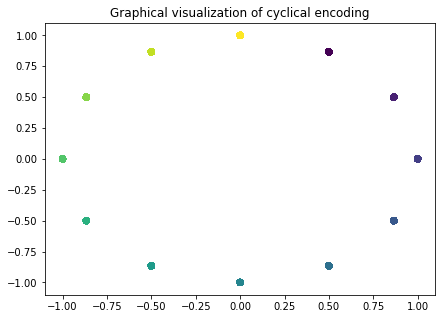

In [ ]:
all_data = pd.concat([train_df, test_df])
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Graphical visualization of cyclical encoding")
ax.scatter(all_data["month_sin"], all_data["month_cos"], c=all_data["month"])

## Feature Standardization

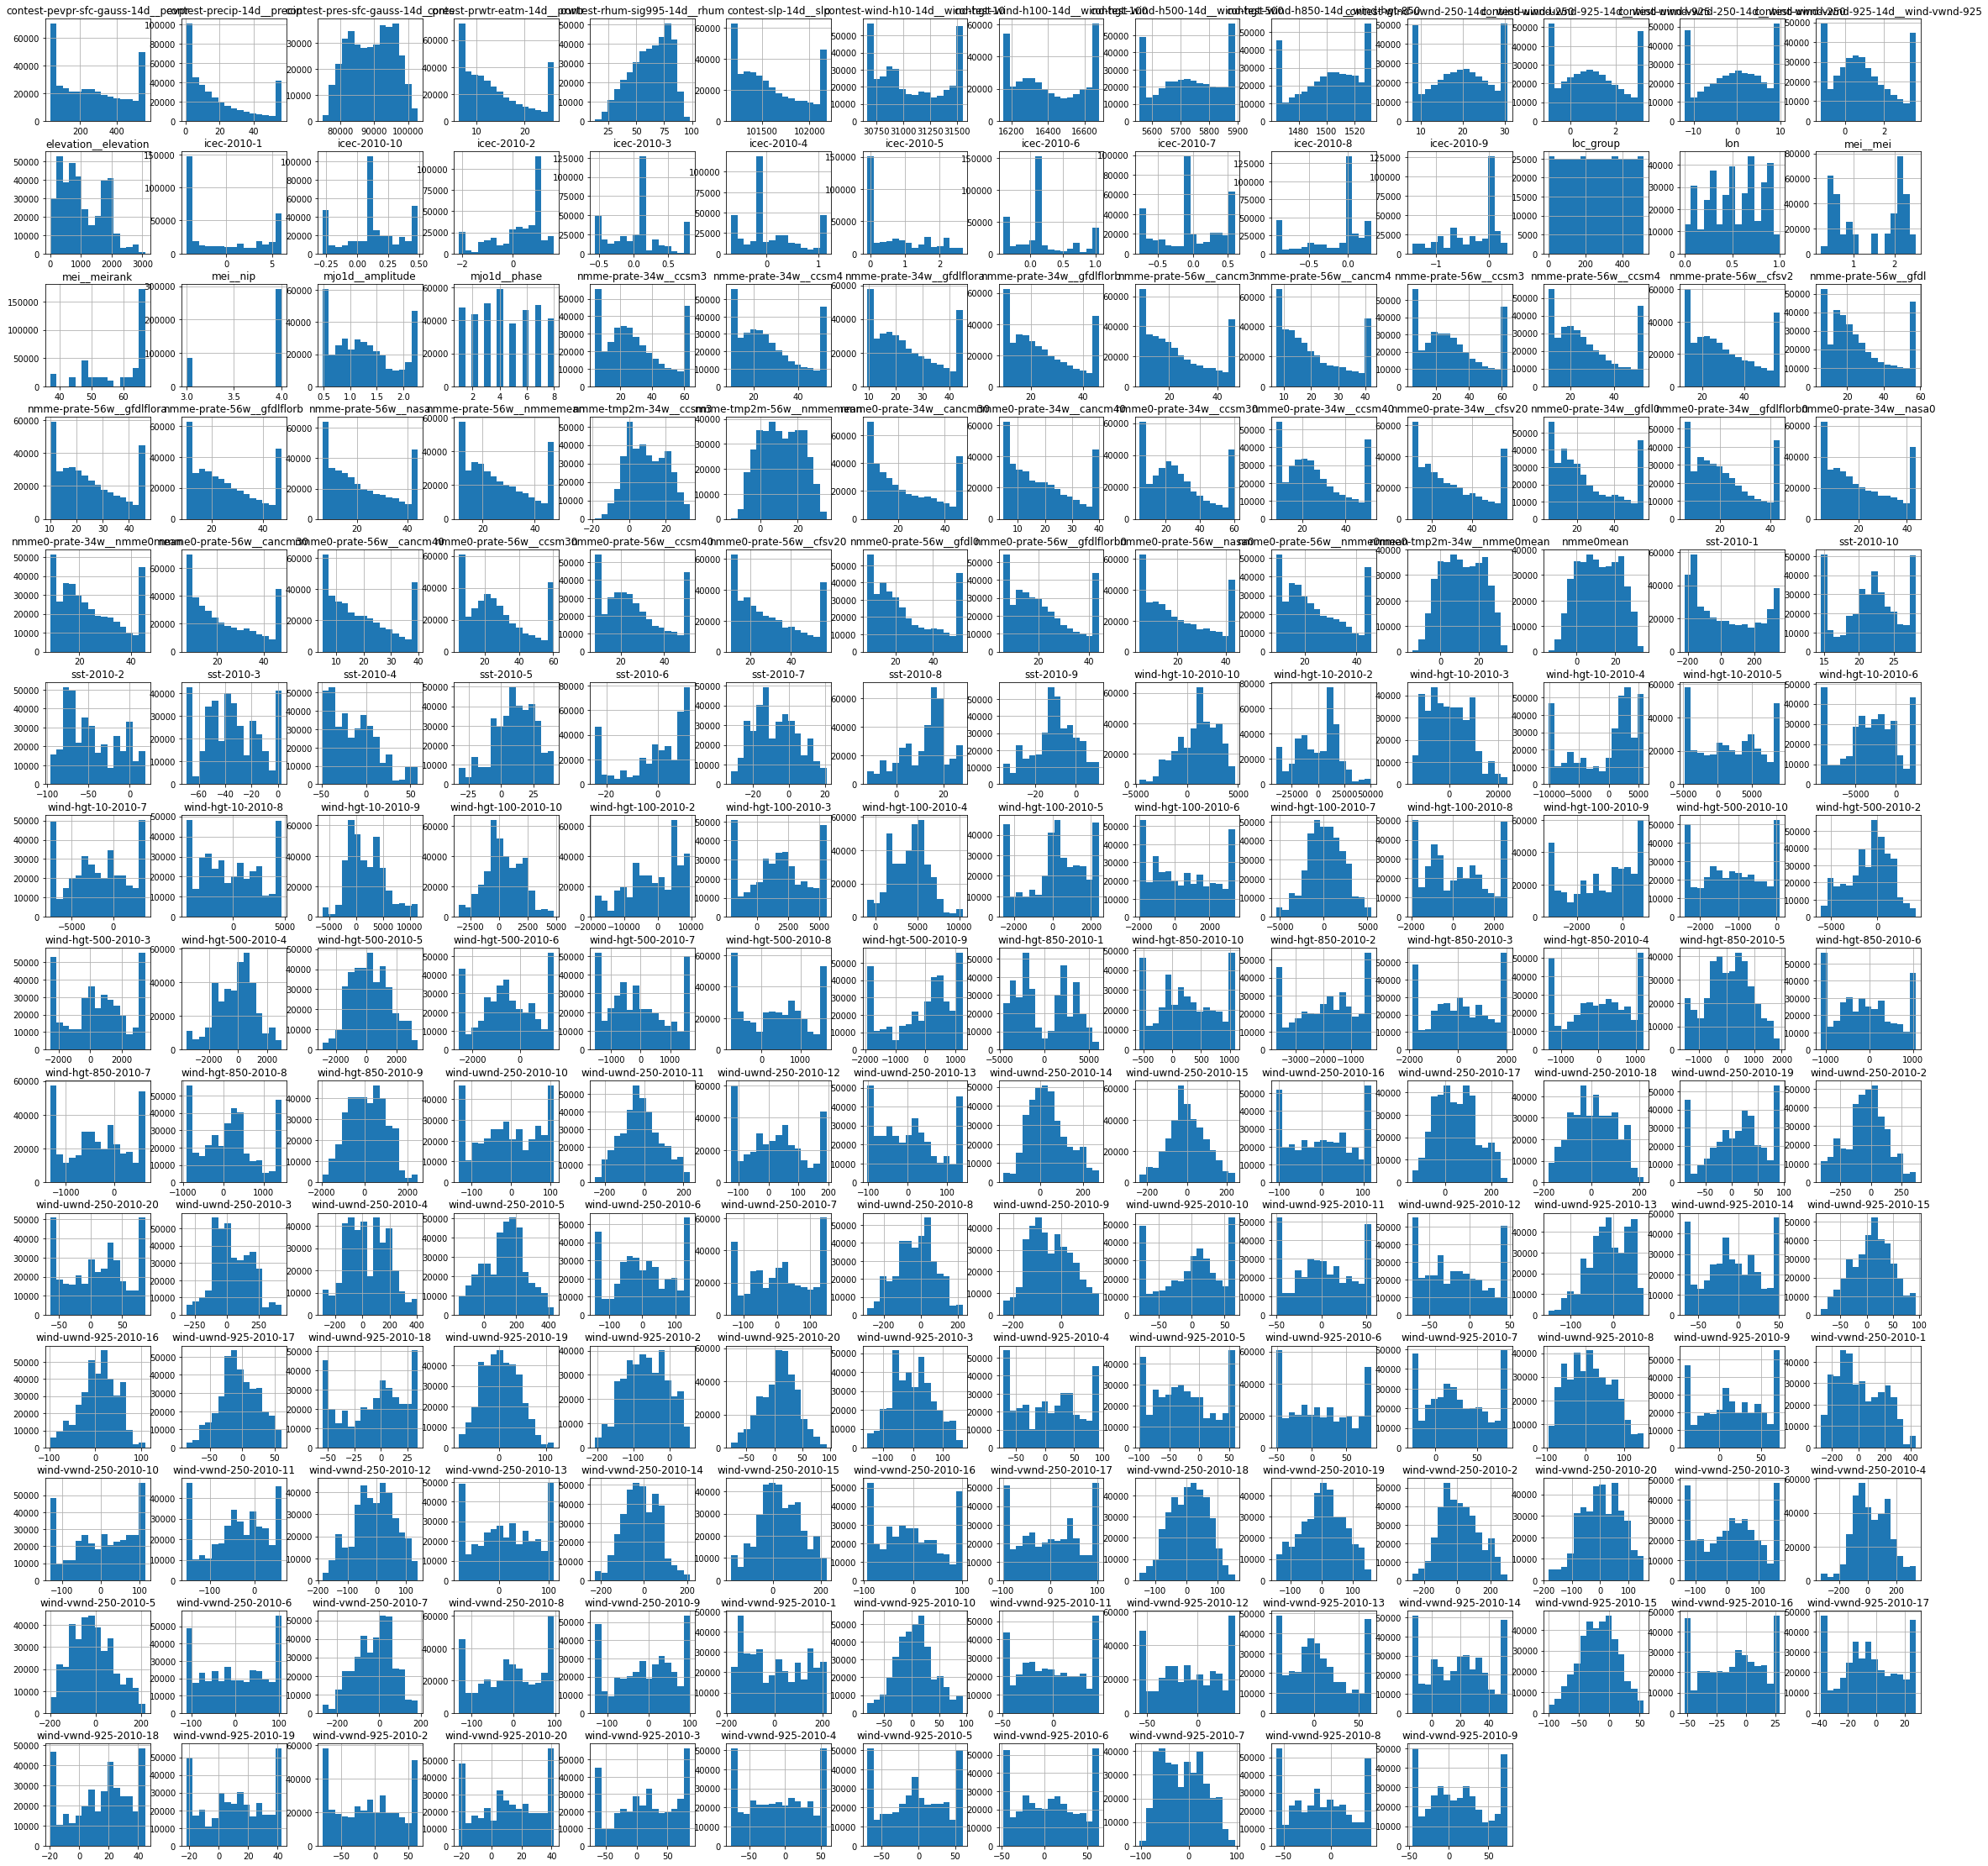

In [ ]:
# Checking feature distribution
train_df[num_cols].hist(bins=15,figsize=(40, 40))
plt.show()

Distributions of the  columns in  the test data


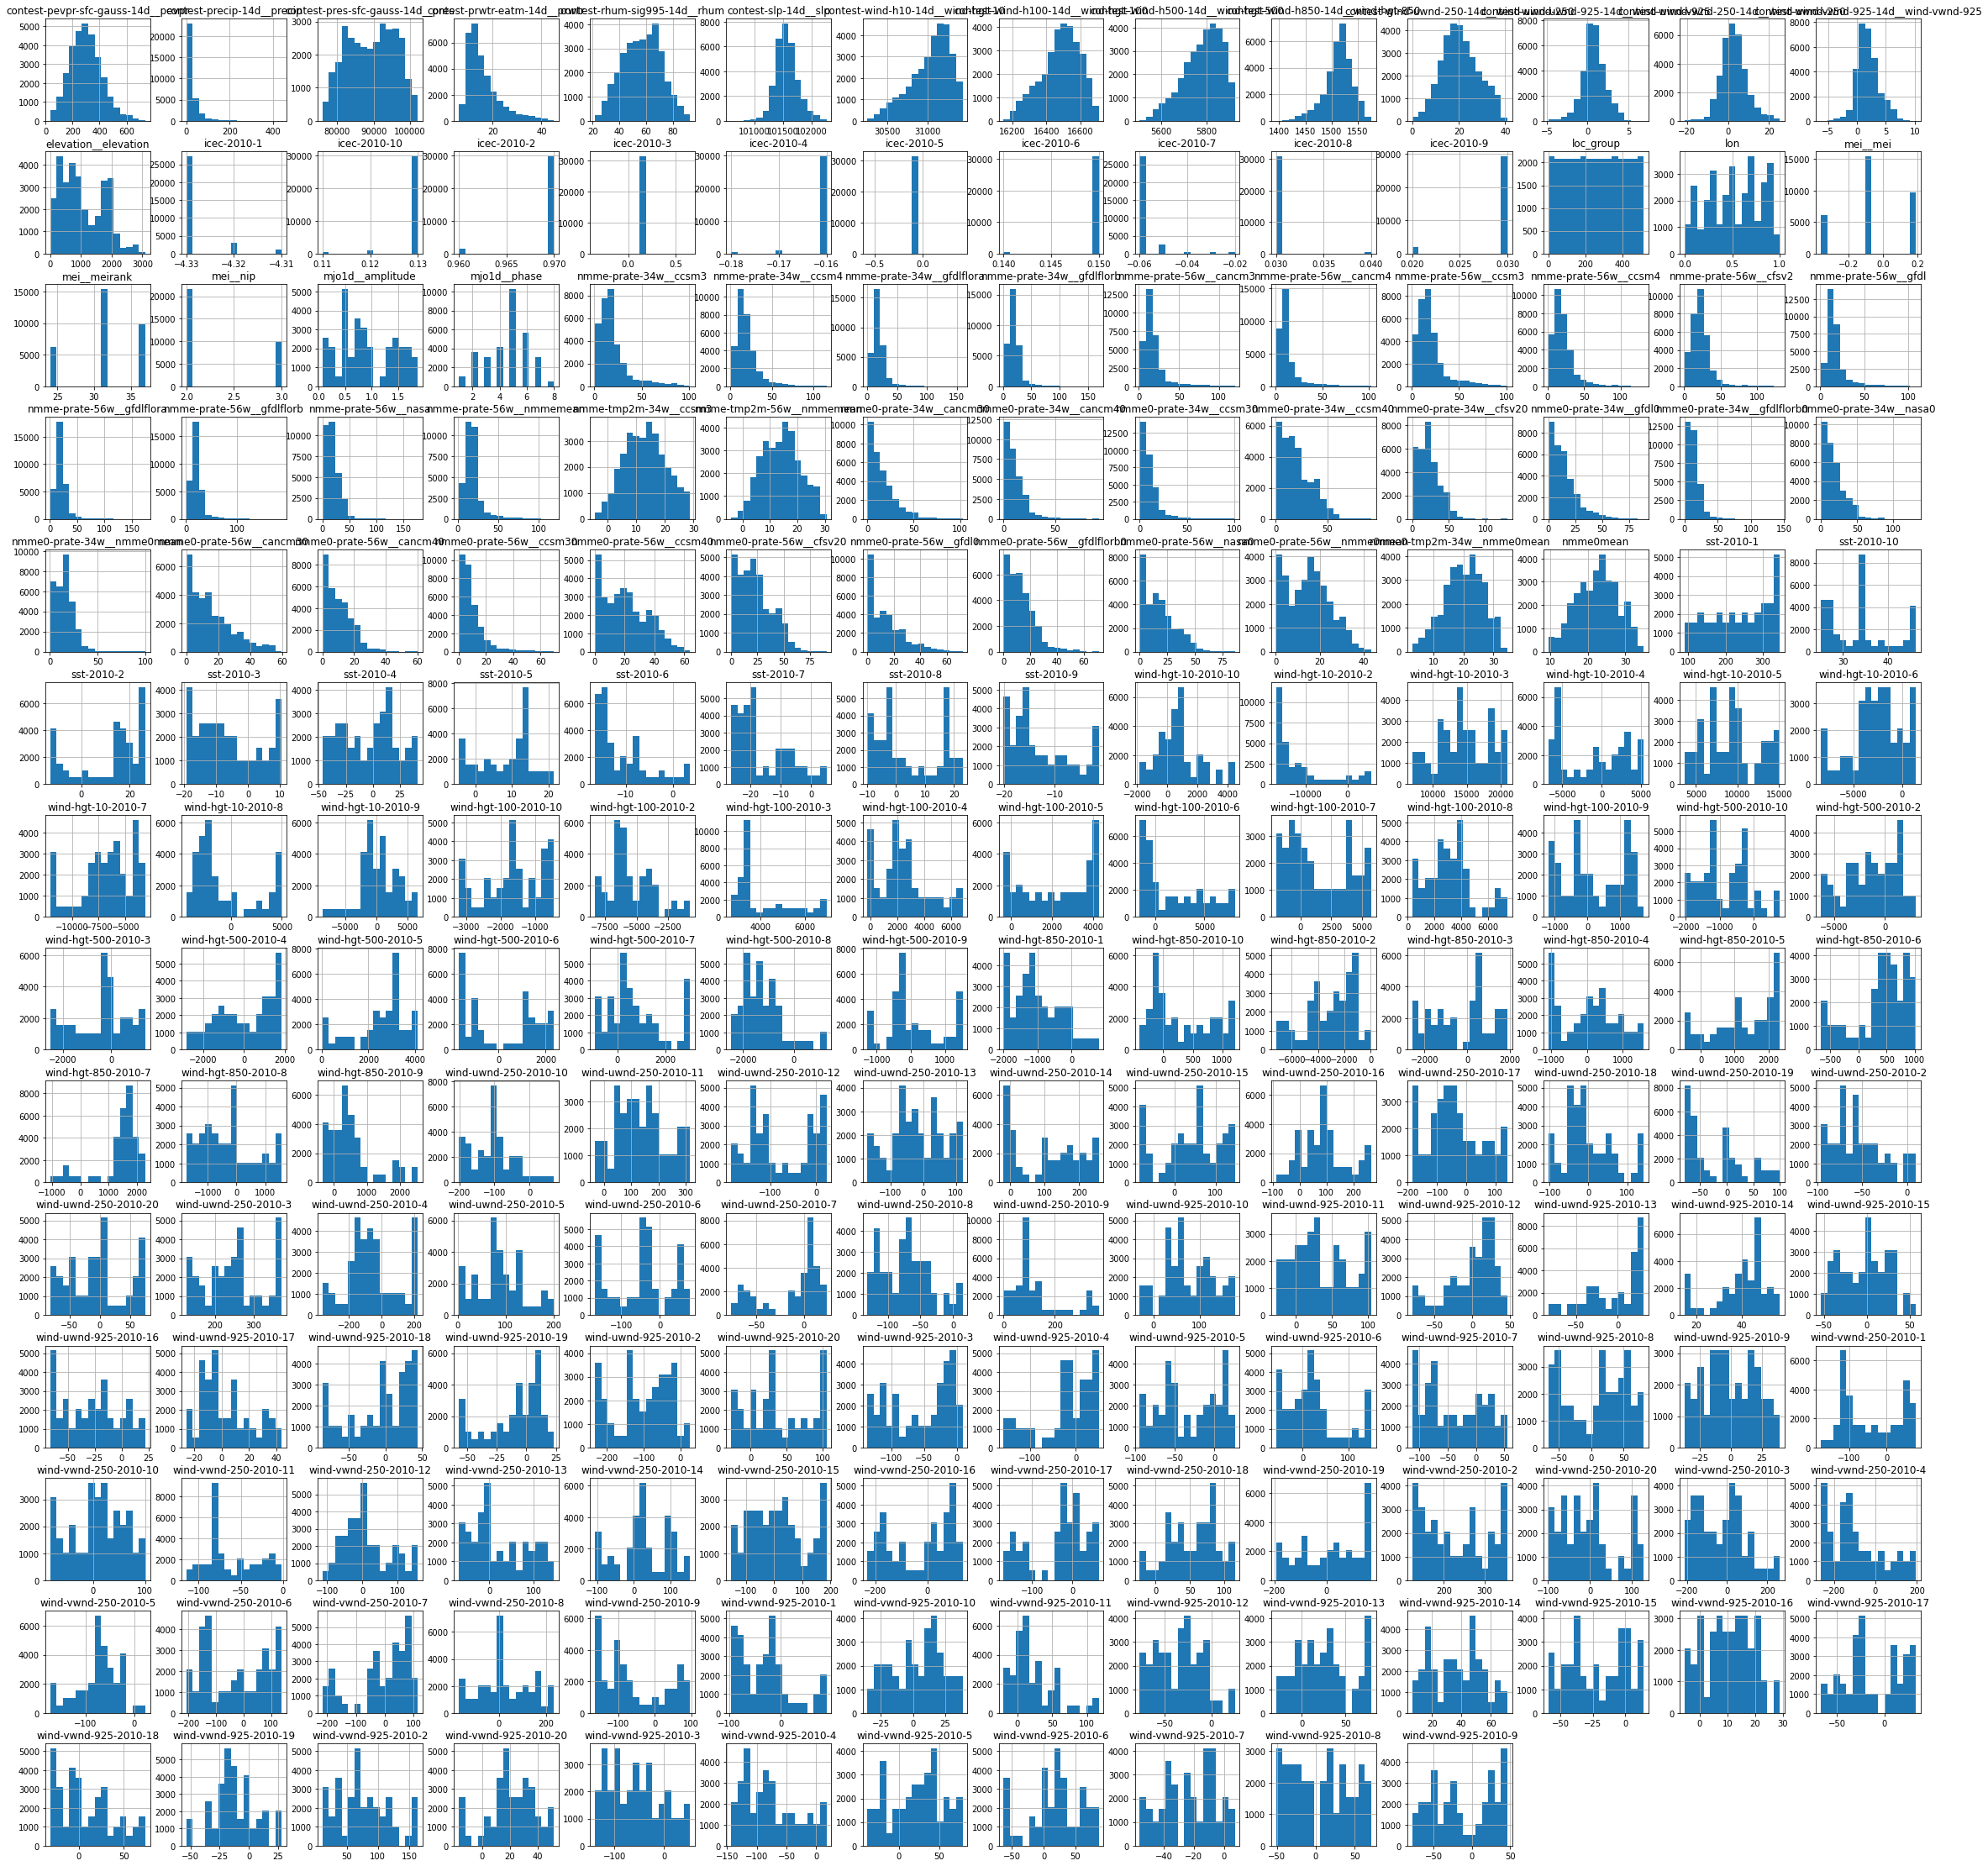

In [ ]:
print('Distributions of the  columns in  the test data')
test_df[num_cols].hist(bins=15,figsize=(40, 40))
plt.show()

In [ ]:
num_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m', 'startdate'])
num_cols

Index(['climateregions__climateregion', 'contest-pevpr-sfc-gauss-14d__pevpr',
       'contest-precip-14d__precip', 'contest-pres-sfc-gauss-14d__pres',
       'contest-prwtr-eatm-14d__prwtr', 'contest-rhum-sig995-14d__rhum',
       'contest-slp-14d__slp', 'contest-wind-h10-14d__wind-hgt-10',
       'contest-wind-h100-14d__wind-hgt-100',
       'contest-wind-h500-14d__wind-hgt-500',
       ...
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-2',
       'wind-vwnd-925-2010-20', 'wind-vwnd-925-2010-3', 'wind-vwnd-925-2010-4',
       'wind-vwnd-925-2010-5', 'wind-vwnd-925-2010-6', 'wind-vwnd-925-2010-7',
       'wind-vwnd-925-2010-8', 'wind-vwnd-925-2010-9'],
      dtype='object', length=205)

In [ ]:
# standard scaling
# pd.to_numeric(train_df) # converting all int types to float
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
train_df.head()

index       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0      0  1.159198 2014-09-01                           -0.178921   
1      1  1.159198 2014-09-02                           -0.224783   
2      2  1.159198 2014-09-03                           -0.271269   
3      3  1.159198 2014-09-04                           -0.245280   
4      4  1.159198 2014-09-05                           -0.177562   

   nmme0-tmp2m-34w__nmme0mean  contest-wind-h10-14d__wind-hgt-10  \
0                    1.793646                           0.558364   
1                    1.793646                           0.552312   
2                    1.793646                           0.534287   
3                    1.793646                           0.513318   
4                    1.793646                           0.491401   

   nmme-tmp2m-56w__nmmemean  contest-rhum-sig995-14d__rhum  \
0                  1.579199                       1.089301   
1                  1.579199                       1.137578   
2                  1.579199                       1.179532   
3                  1.579199                       1.177808   
4                  1.579199                       1.134129   

   nmme-prate-34w__ccsm3  nmme-prate-34w__ccsm4  ...     month    season  \
0              -0.844543              -0.183074  ...  0.718982  1.343489   
1              -0.844543              -0.183074  ...  0.718982  1.343489   
2              -0.844543              -0.183074  ...  0.718982  1.343489   
3              -0.844543              -0.183074  ...  0.718982  1.343489   
4              -0.844543              -0.183074  ...  0.718982  1.343489   

       week  dayofyear  dayofyear_sin  dayofyear_cos  month_sin  month_cos  \
0  0.611932   0.578406      -1.230657      -0.692304  -1.410729    0.00238   
1  0.611932   0.587901      -1.242399      -0.670973  -1.410729    0.00238   
2  0.611932   0.597396      -1.253772      -0.649443  -1.410729    0.00238   
3  0.611932   0.606891      -1.264774      -0.627721  -1.410729    0.00238   
4  0.611932   0.616386      -1.275400      -0.605812  -1.410729    0.00238   

   season_sin  season_cos  
0   -1.417124    0.005808  
1   -1.417124    0.005808  
2   -1.417124    0.005808  
3   -1.417124    0.005808  
4   -1.417124    0.005808  

[5 rows x 208 columns]

In [ ]:
test_df[num_cols] = scaler.fit_transform(test_df[num_cols]) 
test_df.head()

index       lon  startdate  contest-pevpr-sfc-gauss-14d__pevpr  \
0  375734  1.159198 2022-11-01                            0.347231   
1  375735  1.159198 2022-11-02                            0.302370   
2  375736  1.159198 2022-11-03                            0.329714   
3  375737  1.159198 2022-11-04                            0.397903   
4  375738  1.159198 2022-11-05                            0.496854   

   nmme0-tmp2m-34w__nmme0mean  contest-wind-h10-14d__wind-hgt-10  \
0                     1.59789                           0.819078   
1                     1.59789                           0.809402   
2                     1.59789                           0.787662   
3                     1.59789                           0.769890   
4                     1.59789                           0.744264   

   nmme-tmp2m-56w__nmmemean  contest-rhum-sig995-14d__rhum  \
0                  2.001765                       1.044448   
1                  2.001765                       1.036774   
2                  2.001765                       1.071657   
3                  2.001765                       1.033286   
4                  2.001765                       0.984449   

   nmme-prate-34w__ccsm3  nmme-prate-34w__ccsm4  ...    month   season  \
0              -0.185206               0.710551  ... -1.01653  1.01653   
1              -0.185206               0.710551  ... -1.01653  1.01653   
2              -0.185206               0.710551  ... -1.01653  1.01653   
3              -0.185206               0.710551  ... -1.01653  1.01653   
4              -0.185206               0.710551  ... -1.01653  1.01653   

       week  dayofyear  dayofyear_sin  dayofyear_cos  month_sin  month_cos  \
0 -1.586021  -1.703886      -1.506288      -2.122550   -1.01653   -1.01653   
1 -1.586021  -1.647089      -1.471497      -2.024335   -1.01653   -1.01653   
2 -1.586021  -1.590293      -1.435726      -1.927164   -1.01653   -1.01653   
3 -1.586021  -1.533497      -1.398988      -1.831065   -1.01653   -1.01653   
4 -1.586021  -1.476701      -1.361291      -1.736065   -1.01653   -1.01653   

   season_sin  season_cos  
0    -1.01653    -1.01653  
1    -1.01653    -1.01653  
2    -1.01653    -1.01653  
3    -1.01653    -1.01653  
4    -1.01653    -1.01653  

[5 rows x 207 columns]

# Exporting Our New Shiny Clean Datasets

In [ ]:
# We then extract the shiny clean processed datasets for modelling
train_df.to_csv(r'clean_train.csv', index=False)
test_df.to_csv(r'clean_test.csv', index=False)

# Running the Baseline Model using LGBM

## Splitting the train dataset

In [ ]:
# Select main columns to be used in training
main_cols = train_df.columns.difference(['index', 'contest-tmp2m-14d__tmp2m', 'startdate'])
X = train_df[main_cols]
y = train_df['contest-tmp2m-14d__tmp2m']
test_X = test_df.drop(['index', 'startdate'], axis=1)

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)

(263013, 205)
(112721, 205)


## LGBM

In [ ]:
# custom function to run light gbm model
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 55,
        "min_child_samples" : 100,
        "learning_rate" : 0.03,
        "bagging_fraction" : 0.78,
        "feature_fraction" : 0.78,
        "bagging_seed" : 42,
        "verbosity" : -1,
        "reg_alpha" : 0.48,
        "reg_lambda" : 0.48
    }

    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model_LGBM = lgb.train(params, lgtrain, 10000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model_LGBM.predict(test_X, num_iteration=model_LGBM.best_iteration)
    pred_val_y = model_LGBM.predict(val_X, num_iteration=model_LGBM.best_iteration)
    return pred_test_y, model_LGBM, pred_val_y

In [ ]:
kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=2017)
print(kf)
pred_test_full = 0
for dev_index, val_index in kf.split(X):
    dev_X, val_X = X.loc[dev_index,:], X.loc[val_index,:]
    dev_y, val_y = y[dev_index], y[val_index]
    pred_test, model_LGBM, evals_result = run_lgb(dev_X, dev_y, val_X, val_y, test_X)
    pred_test_full += pred_test

pred_test_full /= 5
pred_test_full

KFold(n_splits=5, random_state=2017, shuffle=True)
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.49329
[200]	valid_0's rmse: 1.00475
[300]	valid_0's rmse: 0.815877
[400]	valid_0's rmse: 0.72104
[500]	valid_0's rmse: 0.657456
[600]	valid_0's rmse: 0.610738
[700]	valid_0's rmse: 0.576676
[800]	valid_0's rmse: 0.547832
[900]	valid_0's rmse: 0.523487
[1000]	valid_0's rmse: 0.502714
[1100]	valid_0's rmse: 0.485038
[1200]	valid_0's rmse: 0.469537
[1300]	valid_0's rmse: 0.455884
[1400]	valid_0's rmse: 0.443277
[1500]	valid_0's rmse: 0.431086
[1600]	valid_0's rmse: 0.419846
[1700]	valid_0's rmse: 0.410049
[1800]	valid_0's rmse: 0.400424
[1900]	valid_0's rmse: 0.392283
[2000]	valid_0's rmse: 0.384318
[2100]	valid_0's rmse: 0.377015
[2200]	valid_0's rmse: 0.370458
[2300]	valid_0's rmse: 0.36433
[2400]	valid_0's rmse: 0.358232
[2500]	valid_0's rmse: 0.352295
[2600]	valid_0's rmse: 0.346744
[2700]	valid_0's rmse: 0.341844
[2800]	valid_0's rmse: 0.33706
[290

array([13.18676855, 14.71100584, 16.65650135, ...,  2.16773568,
        4.78006993,  6.34281272])

### Feature Importance

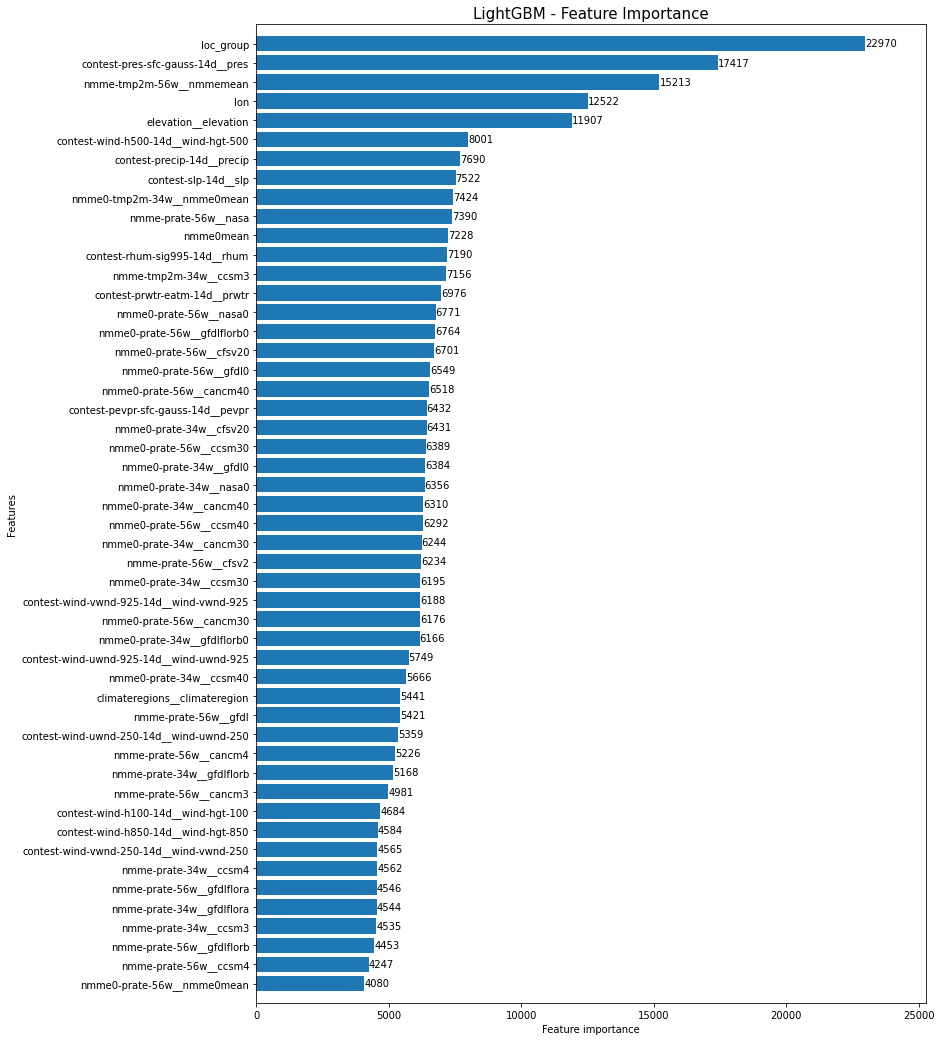

In [ ]:
fig, ax = plt.subplots(figsize=(12,18))
lgb.plot_importance(model_LGBM, max_num_features=50, height=0.8, ax=ax)
ax.grid(False)
plt.title("LightGBM - Feature Importance", fontsize=15)
plt.show()

# Making the Baseline Submission

In [ ]:
# submission = pd.read_csv('/kaggle/input/widsdatathon2023/sample_solution.csv') 
submission = pd.read_csv('data/sample_solution.csv')
submission.head()

contest-tmp2m-14d__tmp2m   index
0                 27.073876  375734
1                 25.109308  375735
2                 22.557390  375736
3                 25.572875  375737
4                 20.781073  375738

In [ ]:
submission[target] = model_LGBM.predict(test_X)
submission

contest-tmp2m-14d__tmp2m   index
0                     13.672342  375734
1                     14.996409  375735
2                     16.932757  375736
3                     19.649338  375737
4                     21.906166  375738
...                         ...     ...
31349                 -0.628739  407083
31350                  1.544903  407084
31351                  2.395248  407085
31352                  5.682260  407086
31353                  6.769483  407087

[31354 rows x 2 columns]

In [ ]:
submission.to_csv('submission.csv', index = False) 

# TODO

## On EDA & Pre-processing
- Check for feature distribution
- Check for feature importance ( through correlation & collinearity )
- Check for target distribution
- Explore the time series problem 
    - [Data Drift Problem - WiDs 2023](https://colab.research.google.com/drive/10r73mOp1R7cORfeuP97V65a-rgwGyfWr?usp=sharing#scrollTo=fSugaG6JqbuK)
    - [Info article](https://engineering.99x.io/time-series-forecasting-in-machine-learning-3972f7a7a467)

## On Feature Engineering
- Use what we know about the following features to create new more meaningful data:
    - nmme model forecasts
    - wind
    - precipitation
    - pressure (both sea and atmospheric)
    - mjo
    - mei
    - ice concentration
    - sea surface temperature

## Modelling
- Hyperparameter Tuning
- More models

## On Visualisation
- Visualise the dire state of the climate based on the target feature
    - Show rise of temperature over the given time period
    - State why this is such a bad thing
    - State why we need better forecast models (how they'd help better the climate)
- Visualise how different features affect rise in temperature
    - State possible human activities that cause this
    - Relate this to how humans can better improve the climate
    - This [notebook](https://www.kaggle.com/code/khsamaha/eda-wids-datathon-2023/report) here does this so beautifully (itallian chef hand emoji)
- Visualise what our predictions mean
    - Explain if it forecasts good stuff or bad
    - If good then how do we keep it that way
    - If bad then how do we improve
- Make slides for this ... amybe even a whole sperate notebook just for visualisations!